# Preparación de datos y Aplicación de modelos de aprendizaje supervisados y no supervisados

## Contenido :

### El siguiente jypiter notebook tiene como objetivo preparar, clasificar y dividir los datos previavemente limpiados de los estudiantes de carreras relacionadas a la ingeneria de sistemas que presentaron el examen saber pro en Bogotá en el periodo 2022-2023 

### Importacion de librerias a utilizar

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

### Extraccion del dataset

Este fragmento de código forma parte de un proceso de preparación y análisis de datos en un Jupyter Notebook, enfocado en el rendimiento académico de estudiantes en las pruebas Saber Pro. A continuación, se explica cada línea del código en detalle:

Se carga un archivo CSV llamado data_cleaned.csv en un DataFrame de pandas llamado data. Este archivo contiene los datos previamente limpiados de estudiantes de carreras relacionadas con ingeniería de sistemas que presentaron el examen Saber Pro en Bogotá durante el periodo 2022-2023. La función pd.read_csv() es utilizada para leer el archivo y estructurarlo en filas y columnas, facilitando su manipulación y análisis. Posterior, se elimina la columna ESTU_GENERO del DataFrame. Esto se realiza con el método drop(), donde:
- ['ESTU_GENERO'] especifica la columna a eliminar.
- axis=1 indica que la operación se realiza sobre columnas (en lugar de filas).
- inplace=True asegura que la eliminación se aplique directamente al DataFrame original, sin necesidad de crear una copia.

Finalmente, se utiliza el método head() para mostrar las primeras cinco filas del DataFrame. Esto permite verificar que los datos se hayan cargado correctamente y que la columna ESTU_GENERO haya sido eliminada exitosamente. Además, proporciona una visión inicial de la estructura y contenido del conjunto de datos.

In [17]:
data = pd.read_csv('data_cleaned.csv')
data.drop(['ESTU_GENERO'], axis=1, inplace=True)
data.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULAPROPIO,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENESERVICIOTV,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_CUANTOSCOMPARTEBAÑO,ESTU_HORASSEMANATRABAJA,PUNT_GLOBAL
0,6.25,0,6,8,2,1,0,1,0,1,0,0,0,3.5,15.5,165
1,6.25,1,5,6,3,1,0,1,1,0,0,0,0,3.5,25.5,138
2,4.75,0,4,6,2,0,1,1,0,1,0,0,0,3.5,15.5,129
3,4.75,0,1,6,1,1,1,1,0,1,0,0,0,3.5,10.0,164
4,3.25,1,6,7,3,1,1,1,0,1,1,1,0,2.0,15.5,158


### Correlacion de los datos

El fragmento de código proporcionado genera un mapa de calor utilizando la biblioteca Seaborn para visualizar las correlaciones entre las variables del conjunto de datos. A continuación, se explica cada línea del código:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
Esta línea configura el tema visual de Seaborn y establece el tamaño de la figura para el gráfico. El parámetro rc={'figure.figsize':(11.7,8.27)} define las dimensiones del gráfico en pulgadas, lo que asegura que el mapa de calor sea lo suficientemente grande para visualizar todas las correlaciones de manera clara.
sns.heatmap(data.corr(method='kendall'), annot=True, fmt=".2f")
data.corr(method='kendall'): Calcula la matriz de correlación entre las variables del conjunto de datos utilizando el método de correlación de Kendall. Este método es útil para medir relaciones no lineales entre variables ordinales o continuas.
sns.heatmap(): Genera el mapa de calor basado en la matriz de correlación.
annot=True: Muestra los valores numéricos de las correlaciones directamente en las celdas del mapa.
fmt=".2f": Formatea los valores de las correlaciones con dos decimales para mayor claridad.
plt.title('Mapa de Calor aplicando la correlación de Kendall')
Se establece un título descriptivo para el gráfico, indicando que se está utilizando la correlación de Kendall para el análisis.
plt.show()
Finalmente, esta línea muestra el gráfico generado en la salida del notebook.


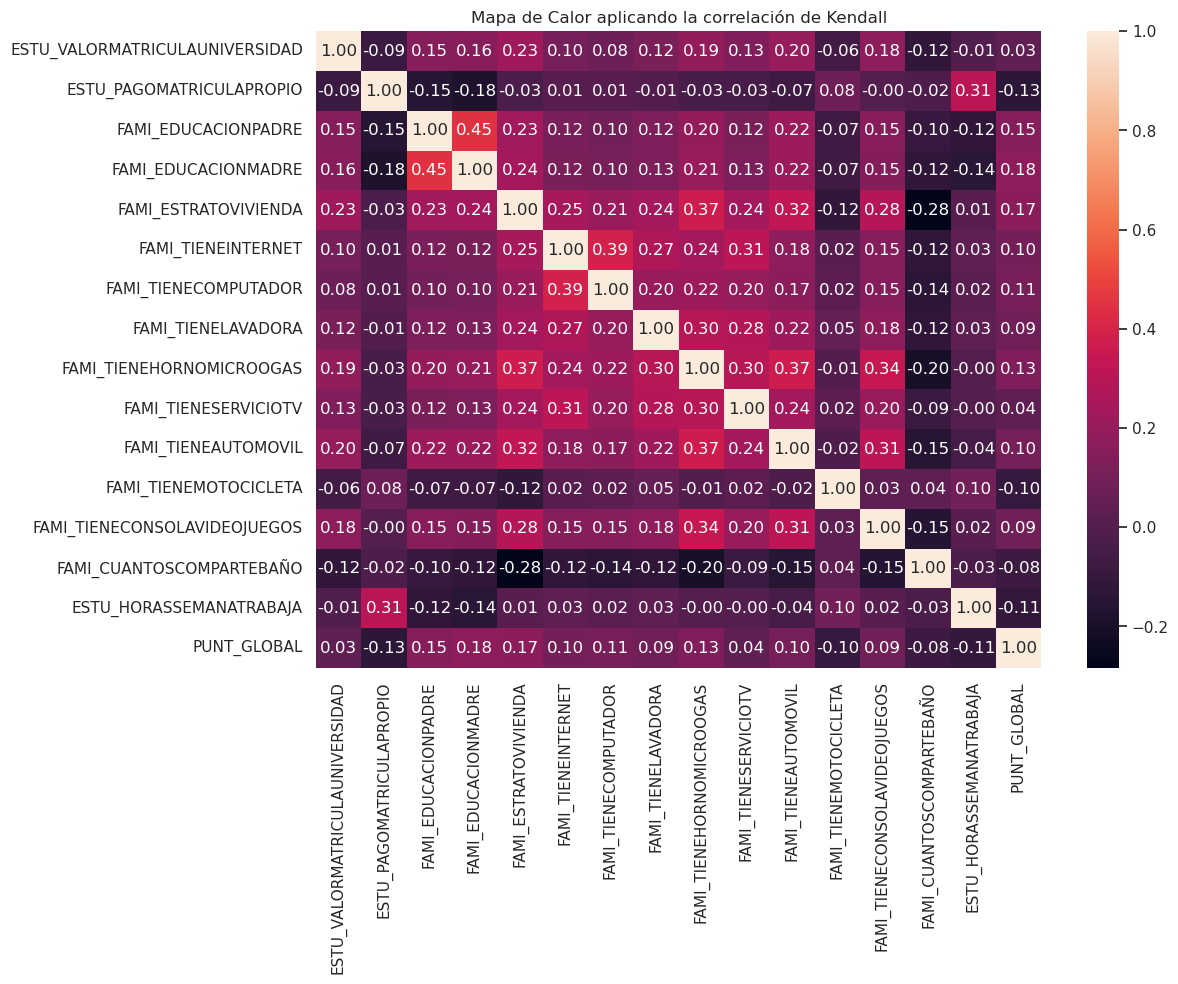

In [18]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(method='kendall'), annot=True, fmt=".2f")
plt.title('Mapa de Calor aplicando la correlación de Kendall')
plt.show()

### Clasificacion de los puntajes globales

Este fragmento de código clasifica los puntajes globales de los estudiantes en categorías y genera un gráfico de barras para visualizar la distribución de estas categorías. A continuación, se explica cada línea del código:

features = data.drop(columns=['PUNT_GLOBAL'])
tarjet = data['PUNT_GLOBAL']

features: Se crea un nuevo DataFrame eliminando la columna PUNT_GLOBAL del conjunto de datos original. Este DataFrame contiene las características que se utilizarán como entrada para los modelos de aprendizaje automático.
tarjet: Se selecciona la columna PUNT_GLOBAL como la variable objetivo (target), que representa los puntajes globales de los estudiantes.

tarjet.replace(to_replace=range(0,100), value='Bajo', inplace=True)
tarjet.replace(to_replace=range(100,140), value='Medio Bajo', inplace=True)
tarjet.replace(to_replace=range(140,180), value='Medio', inplace=True)
tarjet.replace(to_replace=range(180,220), value='Medio Alto', inplace=True)
tarjet.replace(to_replace=range(220,300), value='Superior', inplace=True)

En estas líneas, los valores numéricos de la columna tarjet se reemplazan por etiquetas categóricas que representan rangos de puntajes, se clasifica el puntaje global siguiendo los rangos propuestos en el texto : "Técnicas de Machine Learning para la predicción del rendimiento académico en las pruebas Saber Pro en Colombia".

- 0-100: Se clasifica como "Bajo".
- 100-140: Se clasifica como "Medio Bajo".
- 140-180: Se clasifica como "Medio".
- 180-220: Se clasifica como "Medio Alto".
- 220-300: Se clasifica como "Superior".

El método replace() se utiliza para realizar esta transformación, y el parámetro inplace=True asegura que los cambios se apliquen directamente al objeto tarjet.

sns.countplot(x=tarjet, data=data)

sns.countplot(): Genera un gráfico de barras que muestra la cantidad de estudiantes en cada categoría de puntaje.
x=tarjet: Especifica que las categorías de puntaje serán representadas en el eje x.
data=data: Aunque no es necesario en este caso, se incluye el DataFrame original como referencia

<Axes: xlabel='PUNT_GLOBAL', ylabel='count'>

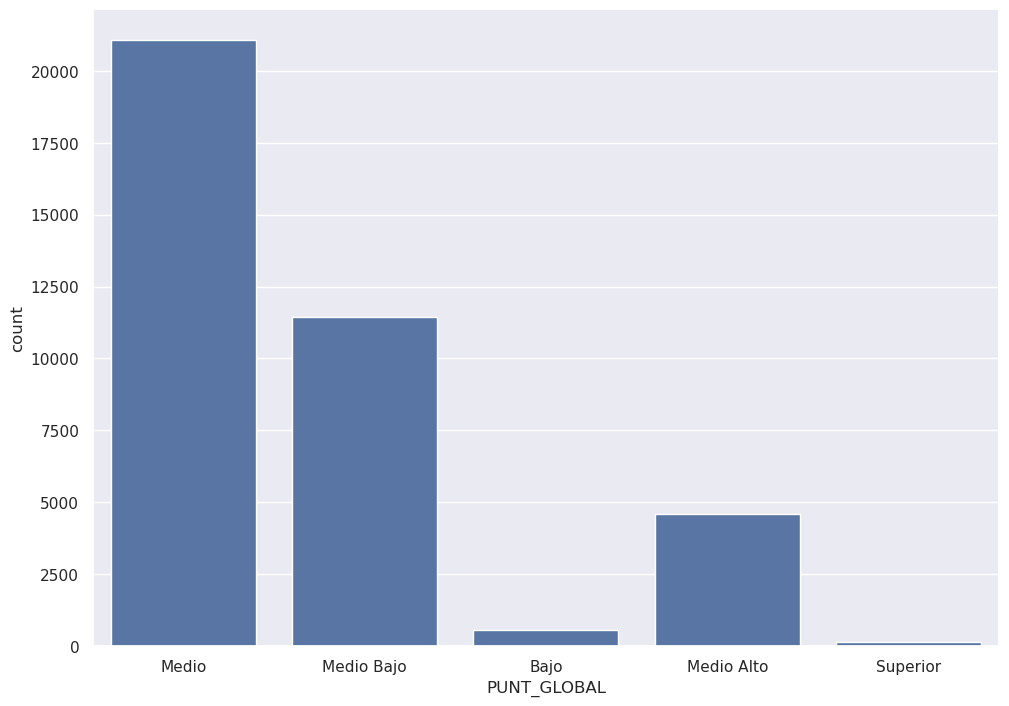

In [19]:
# Classify tarjet
features = data.drop(columns=['PUNT_GLOBAL'])
tarjet = data['PUNT_GLOBAL']
tarjet.replace(to_replace=range(0,100), value='Bajo', inplace=True)
tarjet.replace(to_replace=range(100,140), value='Medio Bajo', inplace=True)
tarjet.replace(to_replace=range(140,180), value='Medio', inplace=True)
tarjet.replace(to_replace=range(180,220), value='Medio Alto', inplace=True)
tarjet.replace(to_replace=range(220,300), value='Superior', inplace=True)
sns.countplot(x=tarjet)

### Aplicacion del algoritmo de aprendizaje supervisado k-vecinos
Este fragmento de código implementa un modelo de clasificación utilizando el algoritmo K-Nearest Neighbors (KNN) para predecir las categorías de puntajes globales de los estudiantes. A continuación, se explica cada paso:

features_train, features_test, tarjet_train, tarjet_test = train_test_split(features, tarjet, test_size=0.2, random_state=3, stratify=tarjet)

train_test_split(): Divide el conjunto de datos en conjuntos de entrenamiento y prueba.
- features: Contiene las características (variables independientes).
- tarjet: Contiene la variable objetivo (categorías de puntajes).
- test_size=0.2: El 20% de los datos se reserva para pruebas.
- random_state=3: Garantiza la reproducibilidad de la división.
- stratify=tarjet: Asegura que la distribución de las categorías en el conjunto de prueba sea proporcional a la del conjunto original.

knn = KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(): Crea un clasificador KNN.
- n_neighbors=1: Especifica que el modelo considerará el vecino más cercano para realizar la clasificación.
  
knn.fit(features_train, tarjet_train)

fit(): Ajusta el modelo a los datos de entrenamiento (features_train y tarjet_train).

predictions = knn.predict(features_test)

predict(): Realiza predicciones sobre el conjunto de prueba (features_test).




In [20]:

features_train, features_test, tarjet_train, tarjet_test = train_test_split(features, tarjet, test_size=0.2, random_state=1, stratify=tarjet)
knn = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
knn.fit(features_train, tarjet_train)
predictions = knn.predict(features_test)
result = knn.score(features_test, tarjet_test)
accuracy = accuracy_score(tarjet_test, predictions)
print(f"Precision de las prediciones: {accuracy:.2f}")

Precision de las prediciones: 0.56
